In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv


In [2]:
df = pd.read_csv("/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
df1=df.reset_index()['Close']
df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64

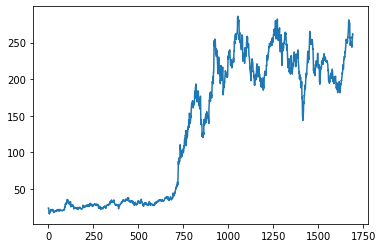

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
import numpy as np

In [6]:
df1

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
1687    246.169998
1688    258.000000
1689    255.729996
1690    262.049988
1691    261.500000
Name: Close, Length: 1692, dtype: float64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
print(df1)

[[0.02993635]
 [0.02971433]
 [0.02279455]
 ...
 [0.88784039]
 [0.91122698]
 [0.9091918 ]]


In [9]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(1099, 593)

In [11]:
train_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.82567342],
       [0.79621815],
       [0.8341474 ]])

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(998, 100)
(998,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(492, 100)
(492,)


(None, None)

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 10s 320ms/step - loss: 0.0798 - val_loss: 0.0331
Epoch 2/100
16/16 [==============================] - 4s 229ms/step - loss: 0.0050 - val_loss: 0.0063
Epoch 3/100
16/16 [==============================] - 4s 245ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 4/100
16/16 [==============================] - 4s 222ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 5/100
16/16 [==============================] - 4s 232ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 6/100
16/16 [==============================] - 3s 216ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 7/100
16/16 [==============================] - 3s 221ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 8/100
16/16 [==============================] - 4s 236ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 9/100
16/16 [==============================] - 3s 210ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 10/100
16/16 [==============================] - 4s 231ms/step - loss: 0.0013 - val_l

In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

test_predict

array([[190.68059],
       [196.04427],
       [201.72964],
       [206.64838],
       [210.08202],
       [211.71901],
       [211.46722],
       [209.65405],
       [208.09785],
       [207.15916],
       [207.05055],
       [206.93237],
       [208.32086],
       [213.63925],
       [218.63878],
       [221.06082],
       [225.99481],
       [230.14874],
       [232.68193],
       [230.86449],
       [227.68929],
       [227.36284],
       [229.83336],
       [231.55168],
       [234.45387],
       [236.76942],
       [238.85434],
       [242.07341],
       [243.85693],
       [244.3771 ],
       [246.07565],
       [247.69942],
       [247.80345],
       [245.96994],
       [244.69176],
       [245.34027],
       [246.51791],
       [247.25945],
       [249.07086],
       [250.34581],
       [250.09787],
       [248.7653 ],
       [247.8804 ],
       [246.415  ],
       [246.62373],
       [250.57909],
       [254.31918],
       [253.67662],
       [251.46902],
       [249.57028],


In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

120.64709230300828

In [23]:
math.sqrt(mean_squared_error(ytest,test_predict))

225.8006693793315

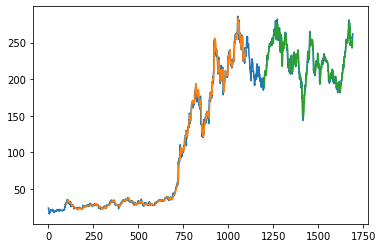

In [24]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
len(test_data)

593

In [26]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 252)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8027679017728274,
 0.8234162210970027,
 0.808318523257598,
 0.7651716811480717,
 0.7843028157980856,
 0.7935908372471968,
 0.7931098203893266,
 0.7811204557797361,
 0.7917776675325673,
 0.8207148779365235,
 0.8554988058781481,
 0.8868783045370606,
 0.9236974714576774,
 0.8932800620207203,
 0.8668960893943725,
 0.8663409939421663,
 0.8585701571672165,
 0.8833999076724424,
 0.8735198088303794,
 0.8833258845843215,
 0.8809946605648611,
 0.8569049263168134,
 0.8665260257595684,
 0.8603093000933107,
 0.880513588200776,
 0.8733718144599382,
 0.8804766025596158,
 0.872076647244339,
 0.8581631115916666,
 0.8324451876405911,
 0.8362936481400132,
 0.8012137351579203,
 0.7650976580599508,
 0.7242820917756853,
 0.7368634782720126,
 0.7146240066917701,
 0.7137729261990958,
 0.7147720565684261,
 0.7085553309021685,
 0.7097764750296467,
 0.7122927271660948,
 0.6988602638775074,
 0.7229499389189259,
 0.7378996460883036,
 0.7566607171035137,
 0.7416370423522299,
 0.7478907536596477,
 0.7540704381785

In [28]:
from numpy import array

lst_output=[]
n_steps=251
i=0
while(i<30):
    
    if(len(temp_input)>251):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.82341622 0.80831852 0.76517168 0.78430282 0.79359084 0.79310982
 0.78112046 0.79177767 0.82071488 0.85549881 0.8868783  0.92369747
 0.89328006 0.86689609 0.86634099 0.85857016 0.88339991 0.87351981
 0.88332588 0.88099466 0.85690493 0.86652603 0.8603093  0.88051359
 0.87337181 0.8804766  0.87207665 0.85816311 0.83244519 0.83629365
 0.80121374 0.76509766 0.72428209 0.73686348 0.71462401 0.71377293
 0.71477206 0.70855533 0.70977648 0.71229273 0.69886026 0.72294994
 0.73789965 0.75666072 0.74163704 0.74789075 0.75407044 0.77457071
 0.76687384 0.76757693 0.75399642 0.7517762  0.7518872  0.75814086
 0.8012877  0.81305505 0.79026049 0.75114708 0.7477427  0.73697454
 0.74711364 0.74796472 0.73886173 0.75451447 0.75418145 0.66925695
 0.6682948  0.65626846 0.67625073 0.68824003 0.71932355 0.7270574
 0.74267315 0.7333481  0.73505031 0.74060093 0.74370927 0.77331258
 0.77283151 0.76498665 0.76128624 0.75710475 0.77875219 0.77508877
 0.78656007 0.75747481 0.76402456 0.79266573 0.7908

In [29]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [30]:
import matplotlib.pyplot as plt

In [31]:
len(df1)

1692

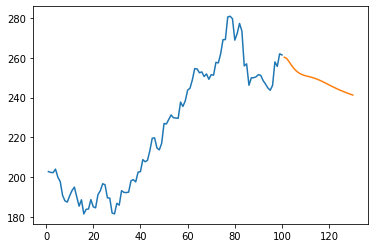

In [32]:
plt.plot(day_new,scaler.inverse_transform(df1[1592:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

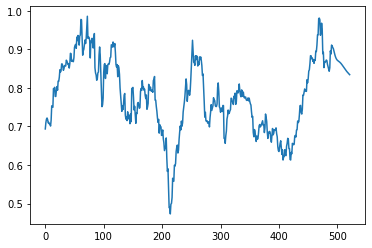

In [33]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

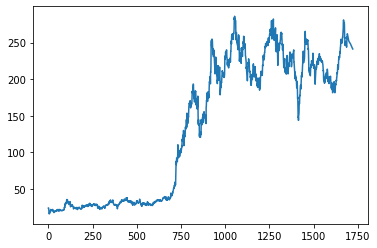

In [34]:
df3=scaler.inverse_transform(df3).tolist()

plt.plot(df3)